In [1]:
import numpy as np
import pandas as pd
import time
from scipy.stats import linregress
from datetime import datetime
import time
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import datetime
import pandas as pd


In [2]:
crude = "crude_reserves_Aug2.csv"
gasoline = "gasoline_Aug2.csv"

In [14]:
crude_df =pd.read_csv(crude, header=[1,2,3,4])
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.rename(columns={'Weekly U.S. Ending Stocks excluding SPR of Crude Oil Thousand Barrels':'Crude'}, inplace=True)
crude_df.rename(columns={'Week of':'Date'}, inplace=True)
crude_df['Date'] = pd.to_datetime(crude_df['Date'], errors='coerce')
crude_df.dtypes

Date     datetime64[ns]
Crude             int64
dtype: object

In [4]:
# #the first 4 lines are info about the csv
# #next line is the header info for crude storage
# # crude_df =pd.read_csv(crude, header=[1,2,3,4,5])
# crude_df.rename(columns={'Weekly U.S. Ending Stocks excluding SPR of Crude Oil Thousand Barrels':'Crude'}, inplace=True)
# crude_df.rename(columns={'Week of':'Date'}, inplace=True)
# # crude_df.rename(columns={'Weekly U.S. Ending Stocks excluding SPR of Crude Oil Thousand Barrels':'Crude Storage'}, inplace=True)
# # crude_df.columns = crude_df.columns.droplevel(0)
# crude_df['Date'] = pd.to_datetime(crude_df['Date'], errors='coerce')
# # crude_df.reset_index(inplace = True, drop = True)
# crude_df

In [16]:
gasoline_df =pd.read_csv(gasoline, header=[1,2,3,4])
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.rename(columns={'Week of':'Date'}, inplace=True)
gasoline_df.rename(columns={'Weekly U.S. Ending Stocks of Total Gasoline Thousand Barrels':'Gasoline Storage'}, inplace=True)
gasoline_df['Date'] = pd.to_datetime(gasoline_df['Date'], errors='coerce')
gasoline_df

,Date,Gasoline Storage
0,2020-07-24,247387
1,2020-07-17,246733
2,2020-07-10,248535
3,2020-07-03,251682
4,2020-06-26,256521
5,2020-06-19,255322
6,2020-06-12,256995
7,2020-06-05,258661
8,2020-05-29,257795
9,2020-05-22,255000


In [ ]:
# #gasoline storage was harder to import
# #there were multiple headers but one column did not have a name 
# #there was a length mismatch due to this
# #I created names for the columns, dropped the headers and used 'usecols' to create column names
# #dropped the first five rows which is just info about Eia
# # gasoline_df=gas_df.iloc[5:]
# # print(df.drop(df.index[[1, 3, 5]]))
# # df.drop(df.index[3:5])
# gasoline_df =pd.read_csv(gasoline,header=[0])
# gasoline_df.rename(columns={'Week of':'Date'}, inplace=True)
# gasoline_df.rename(columns={'Weekly U.S. Ending Stocks of Total Gasoline Thousand Barrels':'Gasoline Storage'}, inplace=True)
# # gas_df=gas_df.drop(gas_df.index[[0]])
# gasoline_df['Date'] = pd.to_datetime(gasoline_df['Date'], errors='coerce')
# # gasoline_df.reset_index(inplace = True, drop = True)
# gasoline_df.dtypes

In [17]:
#display the column names in case they are too big
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
# find all columns
print(crude_df.columns.values)
#find out the names of columns
print(gasoline_df.columns.values)

['Date' 'Crude']
['Date' 'Gasoline Storage']


In [19]:
merged_df=pd.merge(crude_df, gasoline_df, how='outer', on=['Date', 'Date'])
# merged_df.head()
print(merged_df.shape)
# merged_df

merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
merged_df['Year Month'] = merged_df['Date'].dt.strftime('%Y-%m-%d')
merged_df.dtypes

(1974, 3)


Date                datetime64[ns]
Crude                        int64
Gasoline Storage           float64
Year Month                  object
dtype: object

In [20]:
start_date = "2014-09-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

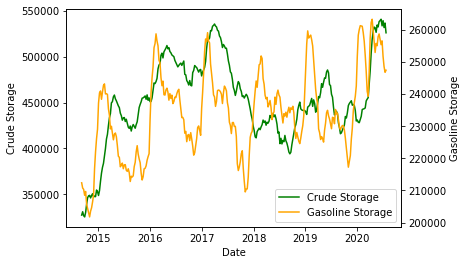

In [21]:
#graphing crude storage and 

crude_date_df = crude_df[(crude_df['Date']> start_date) & (crude_df['Date']< end_date)]
gasoline_date_df = gasoline_df[(gasoline_df['Date']> start_date) & (gasoline_df['Date']< end_date)]

fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'][:339],crude_date_df['Crude'][:339], color='g')
ax1.tick_params(axis='y')

ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_date_df['Date'][:339], gasoline_date_df['Gasoline Storage'][:339], color='orange')
ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')

plt.legend(handles=[green_line, orange_line])

In [ ]:
unique_ym = merged_df['Year Month'].unique()
unique_ym = sorted(unique_ym)
unique_ym

In [ ]:
dates =pd.date_range("2015-01-01", "2020-07-01")
# plt.plot(crude_df)
# plt.title("Oil Prices Analysis")
# plt.ylabel("Storage")
# plt.xlabel("Date")
# plt.grid(True)
# # plt.legend()

# arr1 = plt.arrow(0,0, 3,1, head_width=0.2, color='r', length_includes_head=True)
# arr2 = plt.arrow(0,0, 1,3, head_width=0.2, color='g', length_includes_head=True)



# dates = pd.date_range("2013-01-01", "2020-07-20" )
# x_labels=["Dates"]
# fig, ax = plt.subplots()
# ax.plot(crude_df)
# ax.set_title("Crude Storage")
# # ax.set_yticks(np.arrange(10, 41, setp=2.0))
# ax.grid()
# plt.show()





y = np.cumsum(np.random.normal(size=len(dates)))

s = pd.Series(y, index=dates)

fig, ax = plt.subplots()
ax.plot(s.index, s.values)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
yearFmt = mdates.DateFormatter("'%Y")
ax.xaxis.set_major_formatter(yearFmt)
ax.set_xticks(np.arange(0,51,step=5.0))
ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_formatter(plt.FixedFormatter(df['element_date'].dt.strftime("%m-%d")))
x_dates = df['element_date'].dt.strftime('%m-%d').sort_values().unique()
ax.xaxis.set_major_formatter(plt.FixedFormatter(x_dates))

# plt.show()


In [ ]:
dates = pd.date_range("2013-01-01", "2020-07-20" )


plt.style.use('fivethirtyeight')
ax=crude_df.plot(figsize=(18,7))
ax.set_title("Crude Storage")
ax.set_xlabel("Date",fontsize=16)
ax.set_ylabel("Storage", fontsize=16)
ax.legend(["Crude Storage"], title="Crude", fontsize="12")
ax.grid(True)


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
yearFmt = mdates.DateFormatter("'%Y")
ax.xaxis.set_major_formatter(yearFmt)
# ax.set_xticks(np.arrage(0,51,step=5.0))
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.savefig("Fig_Crude")
plt.show()


In [ ]:
gasoline_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
ax=gasoline_df['Gasoline Storage'][:339].plot(figsize=(18,7))
ax.set_title("Crude Analysis")
ax.set_xlabel("Date", fontsize=16)
# ax.set_ylabel("Storage", fontsize=16)
ax.legend(["Crude", "Gasoline"], title="Crude Analysis", fontsize="12")
ax.grid(True)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
gasoline_df.plot(color='red', ax=ax, width=width, position=1)
crude_df.plot(color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Gasoline Storage')
ax2.set_ylabel('Crude Storage')


# plt.figure()
# plt.plot(gasoline_df['Date'][:339],gasoline_df['Gasoline Storage'][:339])
# plt.plot(crude_df['Date'][:339],crude_df['Crude'][:339])
# locs, labels=plt.xticks()
# plt.ylabel("Storage")
# plt.xlabel("Date")
# plt.grid(True)


plt.show()

In [ ]:
crude_data = crude_df['Crude']
plt.plot(crude_df['Date'][:339],crude_df['Crude'][:339])
plt.plot(gasoline_df['Date'][:339], gasoline_df['Gasoline Storage'][:339])
# plt.gca().invert_xaxis()
plt.title("Oil Prices Analysis")
plt.ylabel("Storage")
plt.xlabel("Date")
plt.grid(True)
# plt.legend()
# plt.show()

In [ ]:
fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_df['Date'][:339],crude_df['Crude'][:339], color='g')
ax1.tick_params(axis='y')

ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_df['Date'][:339], gasoline_df['Gasoline Storage'][:339], color='orange')
ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')

plt.legend(handles=[green_line, orange_line])


# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()